# A. Formulasi Masalah

Dari dataset tersebut akan mengklasifikasi kualitas pencemaran udara berdasarkan kategori perhitungan indeks standar pencemaran udara. Dimana dataset Indeks Standar Pencemaran Udara (ISPU) Tahun 2021 yang didapatan dari website Jakarta Open data dengan link:
https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021

# B. Eksplorasi dan Persiapan Data

## Importing Libraries


Import library yang dibutuhkan untuk mengolah data dan fungsi yang membantu untuk membangun model

In [62]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm

# Import Data

In [2]:
ISPU_Januari_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/c710303c60631a904b4f0896a842c685/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Januari-Tahun-2021.csv'
Januari = pd.read_csv(ISPU_Januari_2021)

ISPU_Februari_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/fd7baa5eb1fe779e2d43f7ce1ff88ee3/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Februari-Tahun-2021.csv'
Februari = pd.read_csv(ISPU_Februari_2021)

ISPU_Maret_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/b93b0a07d5f4ba9cad459748d0ed06c0/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Maret-Tahun-2021.csv'
Maret = pd.read_csv(ISPU_Maret_2021)

ISPU_April_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/225e6e838312eed24d951f0fca58596e/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-April-Tahun-2021.csv'
April = pd.read_csv(ISPU_April_2021)

ISPU_Mei_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/2e39ba6178a132a381ec073b94c9ede6/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Mei-Tahun-2021.csv'
Mei = pd.read_csv(ISPU_Mei_2021)

ISPU_Juni_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/cd2399dab95d976c11c42d7909aba0eb/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Juni-Tahun-2021.csv'
Juni = pd.read_csv(ISPU_Juni_2021)

ISPU_Juli_2021 = 'https://data.jakarta.go.id/dataset/3b56c00404adf8feb3f667cbbd700b7c/resource/2c22721cfcd2f932e8bb7a0e2a22e82a/download/Indeks-Standar-Pencemar-Udara-di-SPKU-Bulan-Juli-Tahun-2021.csv'
Juli = pd.read_csv(ISPU_Juli_2021)

## Memperbiki data
Memperbaiki data dari berbagai sumber ke dalam satu tampilan terpadu.

In [3]:
Juni

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-06-01,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,SEDANG
1,2021-06-02,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,SEDANG
2,2021-06-03,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,SEDANG
3,2021-06-04,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,SEDANG
4,2021-06-05,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
145,2021-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25,SEDANG
146,2021-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25,TIDAK SEHAT
147,2021-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25,SEDANG
148,2021-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25,TIDAK SEHAT


In [4]:
Juli

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-07-01,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG
1,2021-07-02,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG
2,2021-07-03,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG
3,2021-07-04,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT
4,2021-07-05,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
150,2021-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,64,110,32,13,29,35,110,PM25,TIDAK SEHAT
151,2021-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,130,33,17,28,45,130,PM25,TIDAK SEHAT
152,2021-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,78,140,32,18,29,39,140,PM25,TIDAK SEHAT
153,2021-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,75,121,37,12,50,21,121,PM25,TIDAK SEHAT


Dapat dilihat pm10 yang harusnya berisi partikulat salah satu parameter yang diukur, namun di dataset bulan Juni dan Juli berisi lokasi pengukuran di stasiun, dan seterusnya. Terdapat ketidaktepatan label kolom dimana pm10 sampai categori harusnya digeser ke kiri satu kolom dan location/stasiun pindah menggantikan ke sesudah label kolom tanggal.

In [5]:
Juni = Juni.set_axis(['tanggal', 'stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori'], axis=1)
Juni

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-06-01,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,SEDANG
1,2021-06-02,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,SEDANG
2,2021-06-03,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,SEDANG
3,2021-06-04,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,SEDANG
4,2021-06-05,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
145,2021-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,45,70,39,8,16,22,70,PM25,SEDANG
146,2021-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,68,120,28,22,17,41,120,PM25,TIDAK SEHAT
147,2021-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,59,99,25,17,21,30,99,PM25,SEDANG
148,2021-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,72,128,35,24,21,50,128,PM25,TIDAK SEHAT


In [6]:
Juli = Juli.set_axis(['tanggal', 'stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori'], axis=1)
Juli

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-07-01,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG
1,2021-07-02,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG
2,2021-07-03,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG
3,2021-07-04,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT
4,2021-07-05,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT
...,...,...,...,...,...,...,...,...,...,...,...
150,2021-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,64,110,32,13,29,35,110,PM25,TIDAK SEHAT
151,2021-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,130,33,17,28,45,130,PM25,TIDAK SEHAT
152,2021-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,78,140,32,18,29,39,140,PM25,TIDAK SEHAT
153,2021-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,75,121,37,12,50,21,121,PM25,TIDAK SEHAT


## Integrasi data
Menggabungkan data dari berbagai sumber ke dalam satu tampilan terpadu.

In [7]:
ISPU_2021 = pd.concat([Januari, Februari, Maret, April, Mei, Juni, Juli])
ISPU_2021

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
150,2021-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,64,110,32,13,29,35,110,PM25,TIDAK SEHAT
151,2021-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,130,33,17,28,45,130,PM25,TIDAK SEHAT
152,2021-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,78,140,32,18,29,39,140,PM25,TIDAK SEHAT
153,2021-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,75,121,37,12,50,21,121,PM25,TIDAK SEHAT


dapat dilihat, index dataset masih belum terurut sesuai jumlah record dataset. Maka kita terlebih dahalu mereset index di dataset.

In [8]:
ISPU_2021 = ISPU_2021.reset_index(drop=True)
ISPU_2021

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1055,2021-07-27,DKI5 (Kebon Jeruk) Jakarta Barat,64,110,32,13,29,35,110,PM25,TIDAK SEHAT
1056,2021-07-28,DKI5 (Kebon Jeruk) Jakarta Barat,70,130,33,17,28,45,130,PM25,TIDAK SEHAT
1057,2021-07-29,DKI5 (Kebon Jeruk) Jakarta Barat,78,140,32,18,29,39,140,PM25,TIDAK SEHAT
1058,2021-07-30,DKI5 (Kebon Jeruk) Jakarta Barat,75,121,37,12,50,21,121,PM25,TIDAK SEHAT


**About the data:**

Dataset berisi sekitar 7 bulan pengamatan kualitas udara dari Provinsi DKI Jakarta. Pengamatan diambil dari berbagai stasiun.

Dalam proyek ini, kami akan menggunakan data ini untuk memprediksi apakah hari ini kualitas udara akan baik, sedang, atau tidak sehat. Ada 11 atribut termasuk variabel target "categori", yang menunjukkan apakah hari ini kualitas udara akan baik, sedang, atau tidak sehat.

In [9]:
ISPU_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1060 non-null   object
 1   stasiun   1060 non-null   object
 2   pm10      1060 non-null   object
 3   pm25      998 non-null    object
 4   so2       1060 non-null   object
 5   co        1060 non-null   object
 6   o3        1060 non-null   object
 7   no2       1060 non-null   object
 8   max       1060 non-null   int64 
 9   critical  1052 non-null   object
 10  categori  1060 non-null   object
dtypes: int64(1), object(10)
memory usage: 91.2+ KB


## Data cleaning

dapat dilihat dataset yang harusnya int64 tetapi disitu object, untuk mempermudah membersihkan data kita terlebih dahulu mengubahnya ke string semua

In [10]:
df_cleaned = ISPU_2021.astype(str)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1060 non-null   object
 1   stasiun   1060 non-null   object
 2   pm10      1060 non-null   object
 3   pm25      1060 non-null   object
 4   so2       1060 non-null   object
 5   co        1060 non-null   object
 6   o3        1060 non-null   object
 7   no2       1060 non-null   object
 8   max       1060 non-null   object
 9   critical  1060 non-null   object
 10  categori  1060 non-null   object
dtypes: object(11)
memory usage: 91.2+ KB


In [11]:
df_cleaned = ISPU_2021.astype(str)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1060 non-null   object
 1   stasiun   1060 non-null   object
 2   pm10      1060 non-null   object
 3   pm25      1060 non-null   object
 4   so2       1060 non-null   object
 5   co        1060 non-null   object
 6   o3        1060 non-null   object
 7   no2       1060 non-null   object
 8   max       1060 non-null   object
 9   critical  1060 non-null   object
 10  categori  1060 non-null   object
dtypes: object(11)
memory usage: 91.2+ KB


### Menghapus kolom yang tidak perlu
menghapus kolom max dan critical karena parameter yang hasil pengukurannya paling tinggi dari pm10 sampai no2 yang bisa kita hitung sendiri nantinya dan menghapus kolom tanggal dan stasiun karena kategori berasal dari pm10 sampai no2.

In [12]:
df_cleaned = df_cleaned.drop(columns=['tanggal', 'stasiun', 'max', 'critical'])
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,38,53,29,6,31,13,SEDANG
1,27,46,27,7,47,7,BAIK
2,44,58,25,7,40,13,SEDANG
3,30,48,24,4,32,7,BAIK
4,38,53,24,6,31,9,SEDANG
...,...,...,...,...,...,...,...
1055,64,110,32,13,29,35,TIDAK SEHAT
1056,70,130,33,17,28,45,TIDAK SEHAT
1057,78,140,32,18,29,39,TIDAK SEHAT
1058,75,121,37,12,50,21,TIDAK SEHAT


### Handling missing data
Pada tahapan ini, akan dilakukan pengecheckan dataset apakah terdapat data yang bernilai null atau unknown. Ada beberapa strategi untuk menangani data yang bernilai null atau unknown, pada tugas ini saya memilih menghapus atau drop data yang bernilai null atau unknown karena jumlah record dataset yang dimiliki lumayan banyak.

In [13]:
df_cleaned = df_cleaned.replace('---', np.nan)
df_cleaned = df_cleaned.replace('nan', np.nan)
df_cleaned = df_cleaned.replace('TIDAK ADA DATA', np.nan)

df_cleaned.isnull().sum()

pm10        36
pm25        80
so2         19
co          25
o3          36
no2         22
categori     8
dtype: int64

dapat dilihat banyak data yang bernilai null atau unknown, data yang bernilai null atau unknown akan isi dengan median, tetapi kategori yang null atau unknown akan di drop.

In [14]:
#numerik
df_cleaned = round(df_cleaned.fillna(df_cleaned.median()))

#kategori
df_cleaned = df_cleaned.dropna(axis=0)

df_cleaned.isnull().sum()

C:\ProgramData\Anaconda3\envs\AQIPrimeProject\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [15]:
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,38,53,29,6,31,13,SEDANG
1,27,46,27,7,47,7,BAIK
2,44,58,25,7,40,13,SEDANG
3,30,48,24,4,32,7,BAIK
4,38,53,24,6,31,9,SEDANG
...,...,...,...,...,...,...,...
1055,64,110,32,13,29,35,TIDAK SEHAT
1056,70,130,33,17,28,45,TIDAK SEHAT
1057,78,140,32,18,29,39,TIDAK SEHAT
1058,75,121,37,12,50,21,TIDAK SEHAT


### convert to numeric values
Mengubah tipedata sesuai dengan value didalam dataset dan mengubah menkonversi data ke numeric

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      1052 non-null   object
 1   pm25      1052 non-null   object
 2   so2       1052 non-null   object
 3   co        1052 non-null   object
 4   o3        1052 non-null   object
 5   no2       1052 non-null   object
 6   categori  1052 non-null   object
dtypes: object(7)
memory usage: 65.8+ KB


In [17]:
#Parsing int64
df_cleaned = df_cleaned.astype({'pm10': int, 'pm25': int, 'so2': int, 'co': int, 'o3': int, 'no2': int})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      1052 non-null   int32 
 1   pm25      1052 non-null   int32 
 2   so2       1052 non-null   int32 
 3   co        1052 non-null   int32 
 4   o3        1052 non-null   int32 
 5   no2       1052 non-null   int32 
 6   categori  1052 non-null   object
dtypes: int32(6), object(1)
memory usage: 41.1+ KB


### Handling (drop) outliers
Handling (drop) outliers yang digunakan yaitu menggunakan Z-scores dengan outliers_threshold = 3, dimana jika hasil Z-scores >=3 akan di drop.

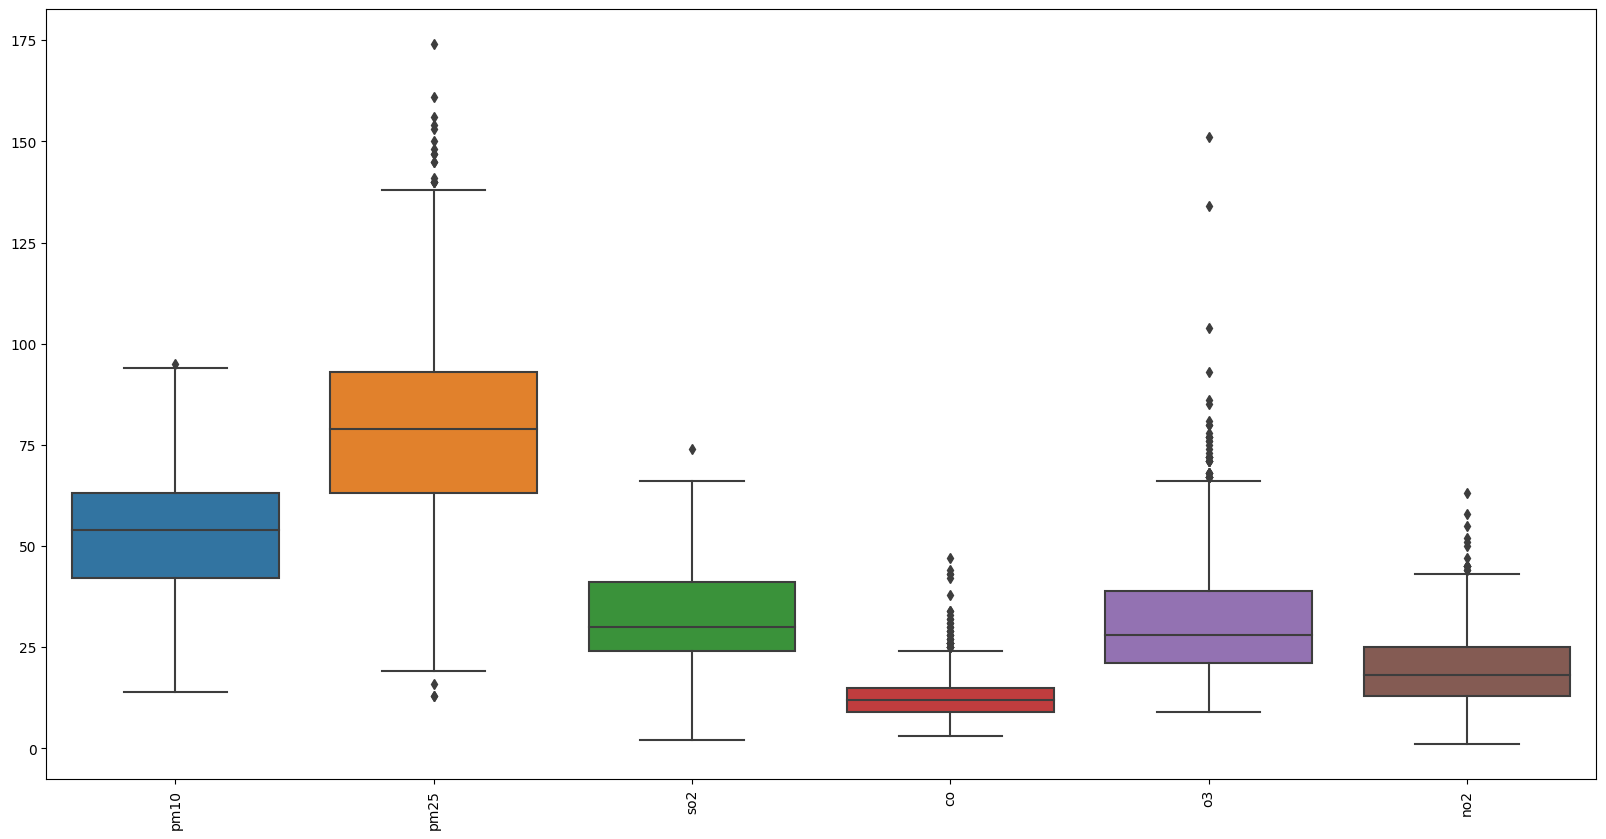

In [18]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target
#Detecting outliers
plt.figure(figsize=(20,10))
sns.boxplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [19]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target

z_scores = np.abs(stats.zscore(features, nan_policy='omit'))
outliers_threshold = 3
mask = (z_scores < outliers_threshold).all(axis=1)
df_cleaned = df_cleaned[mask]

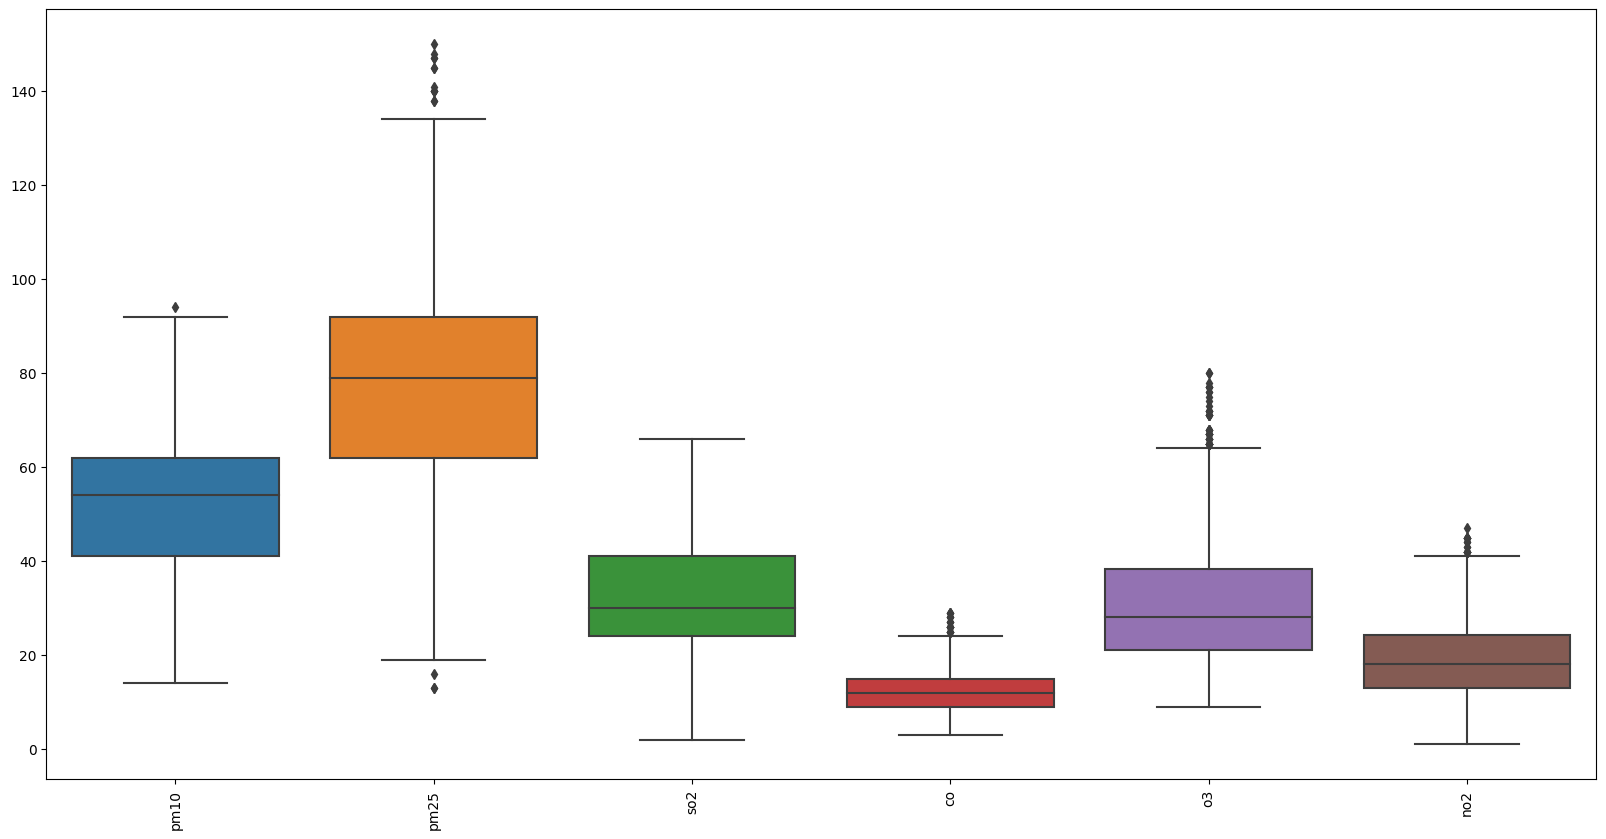

In [20]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target
#Detecting outliers
plt.figure(figsize=(20,10))
sns.boxplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [21]:
df_cleaned

,pm10,pm25,so2,co,o3,no2,categori
0,38,53,29,6,31,13,SEDANG
1,27,46,27,7,47,7,BAIK
2,44,58,25,7,40,13,SEDANG
3,30,48,24,4,32,7,BAIK
4,38,53,24,6,31,9,SEDANG
...,...,...,...,...,...,...,...
1055,64,110,32,13,29,35,TIDAK SEHAT
1056,70,130,33,17,28,45,TIDAK SEHAT
1057,78,140,32,18,29,39,TIDAK SEHAT
1058,75,121,37,12,50,21,TIDAK SEHAT


In [22]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
pm10,1020.0,51.898039,14.863903,14.0,41.0,54.0,62.00,94.0
pm25,1020.0,78.151961,23.277804,13.0,62.0,79.0,92.00,150.0
so2,1020.0,32.745098,11.972561,2.0,24.0,30.0,41.00,66.0
co,1020.0,12.182353,4.661883,3.0,9.0,12.0,15.00,29.0
o3,1020.0,31.779412,14.836478,9.0,21.0,28.0,38.25,80.0
no2,1020.0,19.002941,8.961645,1.0,13.0,18.0,24.25,47.0


## Transformasi data

### Mengubah kategori ke numeric

In [23]:
label_encoder = LabelEncoder()
for i in ['categori']:
    df_cleaned[i] = label_encoder.fit_transform(df_cleaned[i])

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   pm10      1020 non-null   int32
 1   pm25      1020 non-null   int32
 2   so2       1020 non-null   int32
 3   co        1020 non-null   int32
 4   o3        1020 non-null   int32
 5   no2       1020 non-null   int32
 6   categori  1020 non-null   int32
dtypes: int32(7)
memory usage: 35.9 KB


### Scale Features
Kita memiliki data yang setiap atribut memiliki nilai yang terlalu besar maupun terlalu kecil, oleh karena itu kita lakukan normalisasi atau data scaling agar membuat beberapa data memiliki rentang nilai yang sama. Data Scaling yang digunakan yaitu MinMaxScaler, dimana membuat data dalam rentang 0 hingga 1.

In [24]:
features = df_cleaned.drop(['categori'], axis=1) # dropping target

min_max_scaler = MinMaxScaler()
df_transformed = df_cleaned.copy()
for feature in features:
    df_transformed[[feature]] = min_max_scaler.fit_transform(df_cleaned[[feature]])

df_transformed

,pm10,pm25,so2,co,o3,no2,categori
0,0.3000,0.291971,0.421875,0.115385,0.309859,0.260870,1
1,0.1625,0.240876,0.390625,0.153846,0.535211,0.130435,0
2,0.3750,0.328467,0.359375,0.153846,0.436620,0.260870,1
3,0.2000,0.255474,0.343750,0.038462,0.323944,0.130435,0
4,0.3000,0.291971,0.343750,0.115385,0.309859,0.173913,1
...,...,...,...,...,...,...,...
1055,0.6250,0.708029,0.468750,0.384615,0.281690,0.739130,2
1056,0.7000,0.854015,0.484375,0.538462,0.267606,0.956522,2
1057,0.8000,0.927007,0.468750,0.576923,0.281690,0.826087,2
1058,0.7625,0.788321,0.546875,0.346154,0.577465,0.434783,2


In [25]:
df_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
pm10,1020.0,0.473725,0.185799,0.0,0.337500,0.500000,0.600000,1.0
pm25,1020.0,0.475562,0.169911,0.0,0.357664,0.481752,0.576642,1.0
so2,1020.0,0.480392,0.187071,0.0,0.343750,0.437500,0.609375,1.0
co,1020.0,0.353167,0.179303,0.0,0.230769,0.346154,0.461538,1.0
o3,1020.0,0.320837,0.208964,0.0,0.169014,0.267606,0.411972,1.0
no2,1020.0,0.391368,0.194818,0.0,0.260870,0.369565,0.505435,1.0
categori,1020.0,1.040196,0.534714,0.0,1.000000,1.000000,1.000000,2.0


Dapat dilihat pm10 semakin tinggi, maka semakin tidak sehat

## Data Visualization

0: Baik
1: Sedang
2: Tidak Sehat

<AxesSubplot:xlabel='categori', ylabel='pm10'>

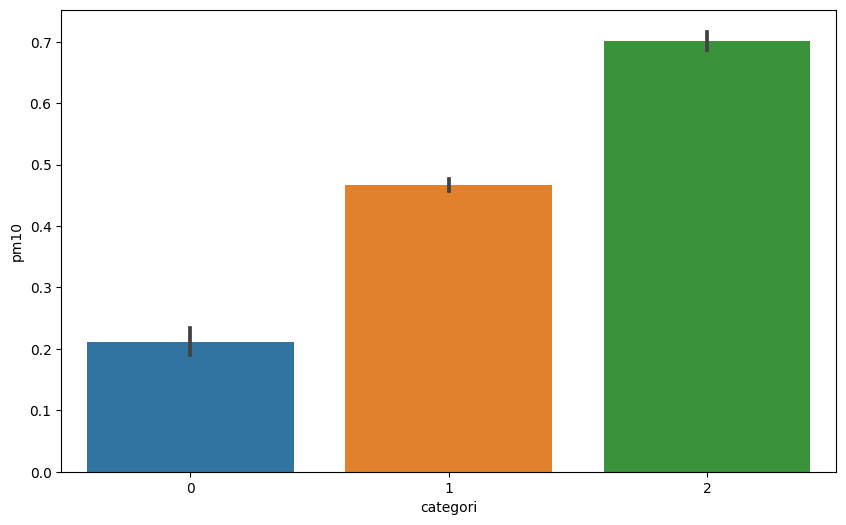

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'pm10', data = df_transformed)

<AxesSubplot:xlabel='categori', ylabel='pm25'>

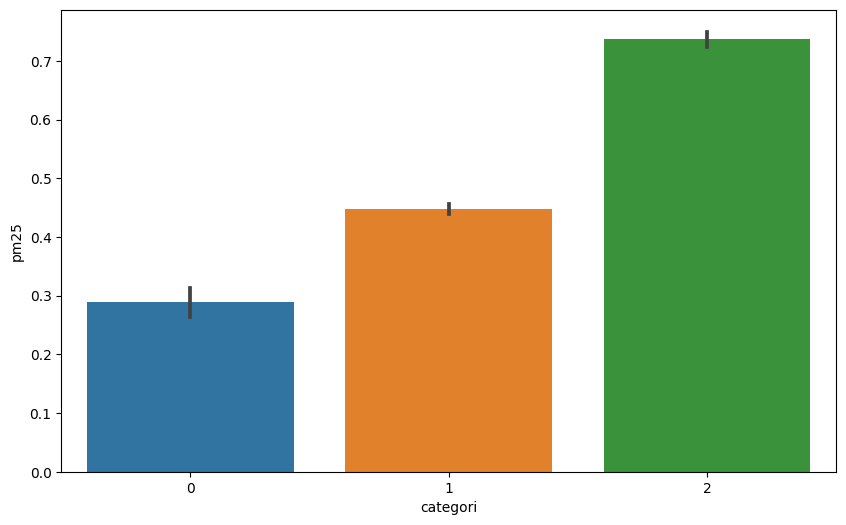

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'pm25', data = df_transformed)

Dapat dilihat pm25 semakin tinggi, maka semakin tidak sehat

<AxesSubplot:xlabel='categori', ylabel='so2'>

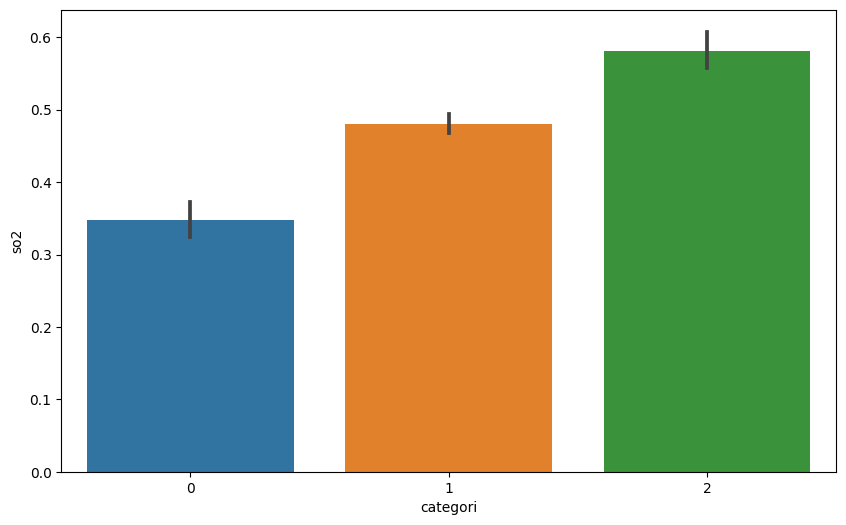

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'so2', data = df_transformed)

Dapat dilihat so2 semakin tinggi, maka semakin tidak sehat

<AxesSubplot:xlabel='categori', ylabel='co'>

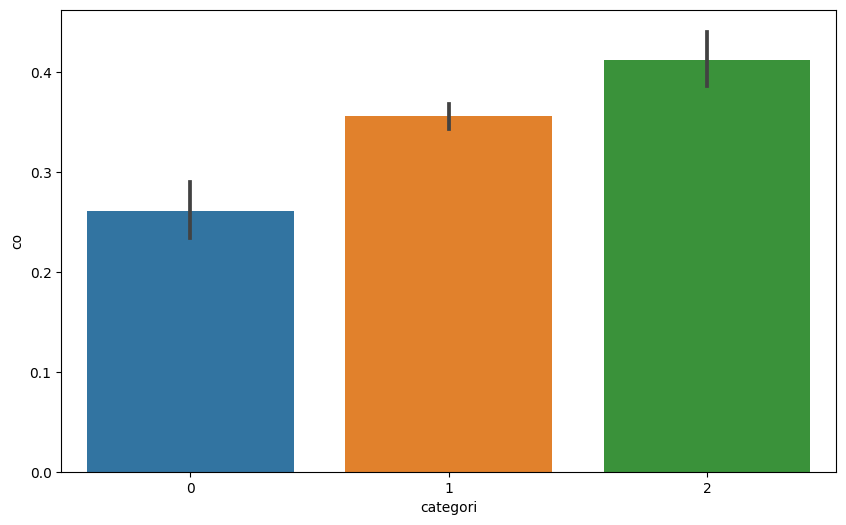

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'co', data = df_transformed)

Dapat dilihat co semakin tinggi, maka semakin tidak sehat

<AxesSubplot:xlabel='categori', ylabel='o3'>

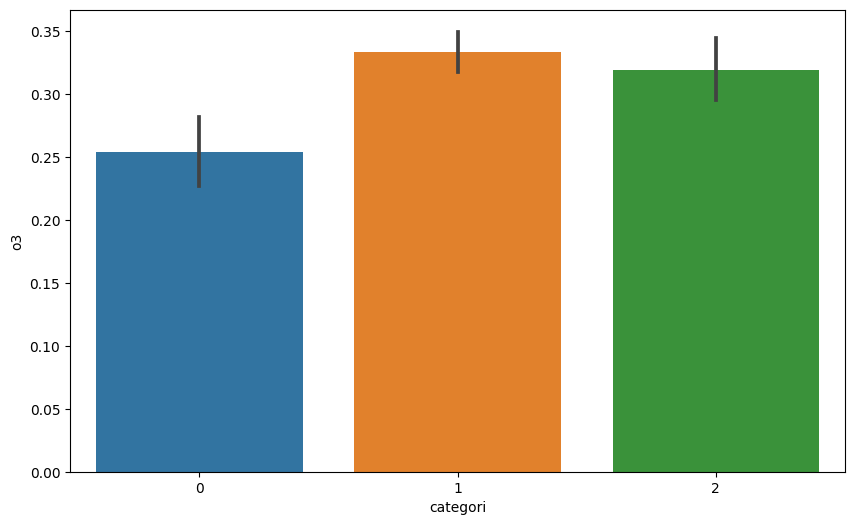

In [30]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'o3', data = df_transformed)

<AxesSubplot:xlabel='categori', ylabel='no2'>

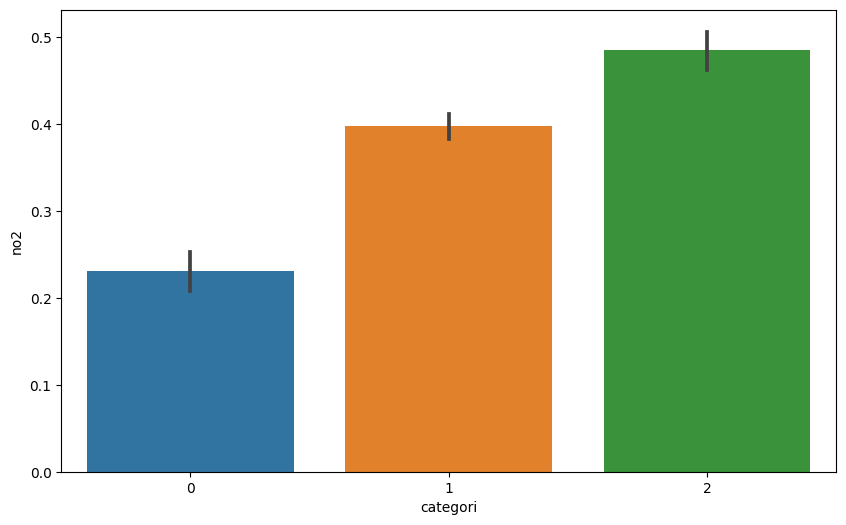

In [31]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'categori', y = 'no2', data = df_transformed)

Dapat dilihat no2 semakin tinggi, maka semakin tidak sehat

<AxesSubplot:xlabel='categori', ylabel='count'>

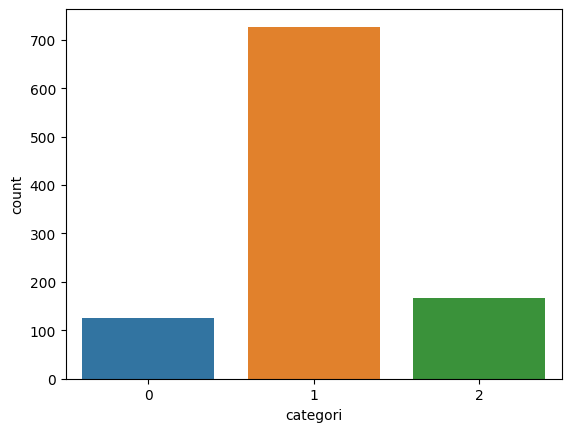

In [32]:
#evaluasi target dan cari tahu apakah data seimbang atau tidak
sns.countplot(x= df_transformed['categori'])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing

In [34]:
df_transformed.head()

,pm10,pm25,so2,co,o3,no2,categori
0,0.3000,0.291971,0.421875,0.115385,0.309859,0.260870,1
1,0.1625,0.240876,0.390625,0.153846,0.535211,0.130435,0
2,0.3750,0.328467,0.359375,0.153846,0.436620,0.260870,1
3,0.2000,0.255474,0.343750,0.038462,0.323944,0.130435,0
4,0.3000,0.291971,0.343750,0.115385,0.309859,0.173913,1


Pisahkan dataset sebagai variabel respons dan variabel fitur

In [35]:
X = df_transformed.iloc[:, 0:6].values
y = df_transformed.iloc[:, 6].values

Train and Test splitting of data 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Decision Tree Classifier

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [38]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.99      0.96      0.97       156
           2       1.00      1.00      1.00        28

    accuracy                           0.96       204
   macro avg       0.91      0.97      0.93       204
weighted avg       0.97      0.96      0.96       204



Decision Tree Classifier memberikan akurasi 96%

In [39]:
print(confusion_matrix(y_test, pred_dtc))

[[ 19   1   0]
 [  7 149   0]
 [  0   0  28]]


In [40]:
print ("Accuracy : ",
    accuracy_score(y_test, pred_dtc)*100)

Accuracy :  96.07843137254902


In [41]:
pred_dtc

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 1, 1])

In [42]:
print(tree.export_text(dtc))

|--- feature_1 <= 0.64
|   |--- feature_1 <= 0.27
|   |   |--- feature_4 <= 0.58
|   |   |   |--- feature_0 <= 0.51
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.51
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  0.58
|   |   |   |--- class: 1
|   |--- feature_1 >  0.27
|   |   |--- feature_0 <= 0.17
|   |   |   |--- feature_1 <= 0.39
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.39
|   |   |   |   |--- feature_4 <= 0.63
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.63
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.17
|   |   |   |--- feature_5 <= 0.08
|   |   |   |   |--- feature_0 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.42
|   |   |   |   |   |--- feature_2 <= 0.37
|   |   |   |   |   |   |--- feature_1 <= 0.46
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.46
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feat

In [43]:
plt.figure(figsize=(200,50))
_ = tree.plot_tree(dtc, filled=True)

In [44]:
pred_dtc12 = dtc.predict([[0.1625,0.240876,0.390625 ,0.153846 ,0.535211 ,0.130435]])

In [45]:
print(pred_dtc12)

[0]


In [46]:
pred_dtc

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 1, 1])

In [64]:
import joblib

In [66]:
filename = 'dt_model.sav'
pickle.dump(dtc, open(filename, 'wb'))

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9607843137254902
